In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sympy as sp
import tensorflow as tf

In [2]:
tensor=np.random.rand(2,3,3,3)
print(tensor.shape)

(2, 3, 3, 3)


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
(x_train, y_train),(x_test,y_test)=keras.datasets.mnist.load_data()


In [5]:
#normalize pixel values
x_train,x_test=x_train/255.0,x_test/255.0

In [6]:
#reshape to a 4D tensor
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [7]:
#print the tensor shape
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


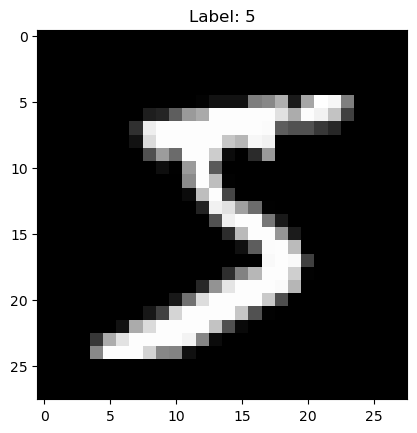

In [8]:
#display a sample image
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

In [9]:
#building a simple CNN
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)), #conv layer
    keras.layers.MaxPooling2D((2,2)), #pooling layer
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'), #fully connected layer
    keras.layers.Dense(10,activation='softmax') #output layer (10 classes)

])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#show model summary
model.summary()

d:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#train the model
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9163 - loss: 0.2781 - val_accuracy: 0.9829 - val_loss: 0.0512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9856 - loss: 0.0447 - val_accuracy: 0.9879 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9893 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9935 - loss: 0.0196 - val_accuracy: 0.9898 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9909 - val_loss: 0.0276


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9892 - loss: 0.0332
Test Accuracy: 99.09%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


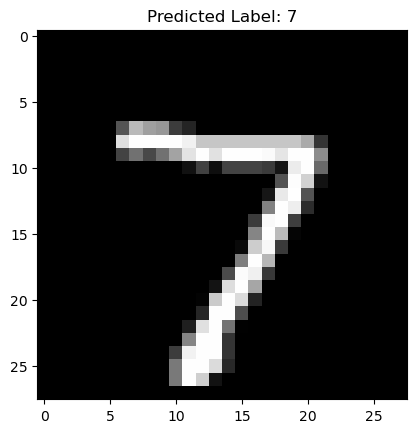

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2%}")

# Make a prediction on a single image
sample_image = np.expand_dims(x_test[0], axis=0)  # Reshape to match input shape (1, 28, 28, 1)
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

# Display the prediction
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9892 - loss: 0.0332
Test Accuracy: 99.09%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


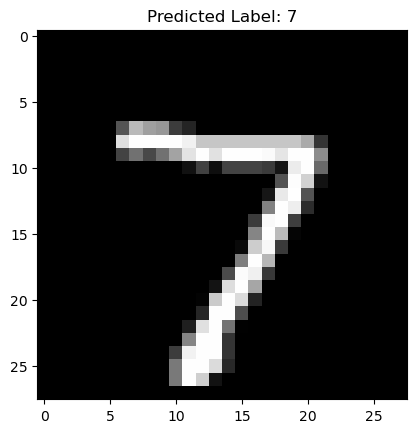

In [13]:
sample_image = np.expand_dims(x_test[0], axis=0)  # Add batch dimension
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


In [18]:
model.save("model.h5")  # Save the model after training


In [ ]:
#using my own image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
#load the trained model
model=tf.keras.models.load_model("model.h5")

In [29]:
#load the image
image_path="pic3.jpg"
image=tf.io.read_file(image_path)
image=tf.image.decode_jpeg(image,channels=3)

In [30]:
#preprocessing the image
image=tf.image.rgb_to_grayscale(image)
image=tf.image.resize(image,(28,28))
image=image/255.0

#expand dimensions to match model input shape
image=tf.expand_dims(image,axis=0)

In [31]:
#make a prediction
prediction=model.predict(image)
predicted_digit=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


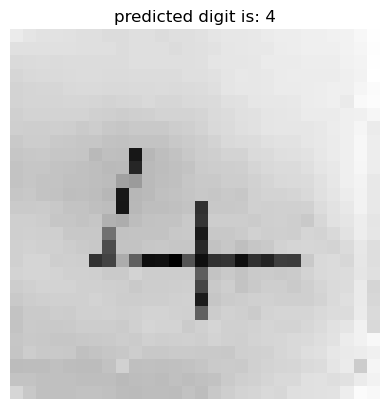

In [32]:
#display image and predicted digit
plt.imshow(image[0,:,:,0],cmap='gray')
plt.title(f"predicted digit is: {predicted_digit}")
plt.axis("off")
plt.show()